importar as bibliotecas necessarias para a munipulação dos dados dos jogadores e importar a base de dados, Faremos a limpeza do dataframe, descartando as colunas que nao contribuirão para a nossa análise, assim como manipulação dos dados para que fiquem corretos.

In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
df_jogadores = pd.read_csv("jogadores_rodada_3.csv")
#df_jogadores.head()
df_jogadores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Apelido                361 non-null    object 
 1   Idade                  361 non-null    int64  
 2   Altura                 361 non-null    object 
 3   Peso                   361 non-null    object 
 4   Jogos                  361 non-null    int64  
 5   Clube                  361 non-null    object 
 6   Nome                   361 non-null    object 
 7   Posicao                361 non-null    object 
 8   Desarme                200 non-null    float64
 9   Falta cometida         190 non-null    float64
 10  Finalizacao fora       112 non-null    float64
 11  Falta sofrida          182 non-null    float64
 12  Gol                    27 non-null     float64
 13  Passe Incompleto       254 non-null    float64
 14  Cartao amarelo         67 non-null     float64
 15  Assist

Serão eliminados as colunas Apelido,Jogos,Nome,Penalti perdido,Gol contra,Clube e Idade.

Também serão eliminados todas as linhas em que todas as colunas das açoes forem NaN, Assim não teremos jogadores que não participaram da partida.

essas não contribuirão para nossa análise.

In [3]:
        
df_jogadores.drop(df_jogadores[((df_jogadores["Desarme"].isnull()) & 
                                (df_jogadores["Falta cometida"].isnull()) &
                                (df_jogadores["Finalizacao fora"].isnull()) &
                                (df_jogadores["Falta sofrida"].isnull()) &
                                (df_jogadores["Gol"].isnull()) &
                                (df_jogadores["Passe Incompleto"].isnull()) &
                                (df_jogadores["Cartao amarelo"].isnull()) &
                                (df_jogadores["Assistencia"].isnull()) &
                                (df_jogadores["Finalizacao defendida"].isnull()) &
                                (df_jogadores["Finalizacao trave"].isnull()) &
                                (df_jogadores["Impedimento"].isnull()) &
                                (df_jogadores["Cartao vermelho"].isnull())
                                )].index,axis=0,inplace=True)          

df_jogadores.reset_index(inplace=True)

df_jogadores.drop(["Apelido","Jogos","Nome","Penalti perdido","Gol contra","index","Clube","Idade"],axis=1,inplace=True)


In [4]:
df_jogadores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Altura                 270 non-null    object 
 1   Peso                   270 non-null    object 
 2   Posicao                270 non-null    object 
 3   Desarme                200 non-null    float64
 4   Falta cometida         190 non-null    float64
 5   Finalizacao fora       112 non-null    float64
 6   Falta sofrida          182 non-null    float64
 7   Gol                    27 non-null     float64
 8   Passe Incompleto       254 non-null    float64
 9   Cartao amarelo         67 non-null     float64
 10  Assistencia            27 non-null     float64
 11  Finalizacao defendida  84 non-null     float64
 12  Finalizacao trave      14 non-null     float64
 13  Impedimento            36 non-null     float64
 14  Cartao vermelho        2 non-null      float64
dtypes: flo

Convertendo a coluna altura e peso que são do tipo string, para valores continuos do tipo Numerico.
Os valores faltantes nas duas colunas serão preenchidos como NaN.

Foi aplicado uma função lambda na coluna Altura e peso,atraves de uma expressao regular foi retirado quaisquer letras possiveis na string,caso a string fosse menor ou igual ao comprimeiro de 2 caracteres, foi substituido por um dado NaN. 

pd.to_numeric() -- Recebe uma series do panda, no caso a coluna que sera convertida para tipo numerico,caso nao consiga converter atribui NaN se errors='coerce' estiver na função


In [5]:
df_jogadores["Peso"] = df_jogadores["Peso"].apply(lambda x: (re.sub("[a-z]",'',x)) if(len(x)>2) else np.nan)
df_jogadores["Peso"] = pd.to_numeric(df_jogadores["Peso"])

In [6]:
#Outra maneira de fazer sem precisar atribuir NaN pela função lambda.
df_jogadores["Altura"] = df_jogadores["Altura"].apply(lambda x: re.sub("[a-z]",'',x))
df_jogadores["Altura"] = pd.to_numeric(df_jogadores["Altura"],errors='coerce')


Pode-se verificar no codigo a baixo que as colunas Altura e Peso, Passaram a ser do tipo numerico.
Verifica-se também que foi atribuido NaN para valores faltantes.

In [7]:
df_jogadores[df_jogadores["Peso"].isnull()]
#df_jogadores.info()

,Altura,Peso,Posicao,Desarme,Falta cometida,Finalizacao fora,Falta sofrida,Gol,Passe Incompleto,Cartao amarelo,Assistencia,Finalizacao defendida,Finalizacao trave,Impedimento,Cartao vermelho
101,1.83,NaN,zag,4.0,3.0,NaN,1.0,NaN,20.0,NaN,NaN,NaN,1.0,NaN,NaN
103,1.78,NaN,mei,1.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
109,1.78,NaN,ata,NaN,5.0,1.0,8.0,NaN,13.0,NaN,NaN,NaN,NaN,3.0,NaN
169,NaN,NaN,mei,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170,1.73,NaN,ata,4.0,3.0,3.0,13.0,NaN,16.0,1.0,NaN,NaN,NaN,NaN,NaN
180,NaN,NaN,zag,2.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
195,NaN,NaN,lat,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
196,1.85,NaN,lat,1.0,5.0,NaN,1.0,NaN,9.0,NaN,NaN,1.0,NaN,NaN,NaN
202,NaN,NaN,ata,1.0,1.0,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN


verificando inconsistencias nos dados de Altura e Peso.

Para a coluna Peso Nenhuma anomalia nos dados foi detectada.

Para a altura uma anomalia foi detectada, o valor sera preenchido com a media da altura feita com jogadores da mesma posicao e onde o peso tenha uma diferença de ate no maximo 2 kg com o peso da anomalia.

In [8]:
#(df_jogadores["Peso"] > 100).sum()
(df_jogadores["Altura"] <= 1).sum()

1

In [9]:
index_anomalia = (df_jogadores[(df_jogadores["Altura"] <= 1)].index) 

media_anomalia = round(df_jogadores[(df_jogadores["Posicao"] == "lat") & (df_jogadores["Peso"] >=70) & (df_jogadores["Peso"] <=74)]["Altura"].mean(), 2)

df_jogadores.loc[index_anomalia,'Altura'] = media_anomalia


 Para os valores NaN na coluna Peso e altura, sera preenchido com as médias feita entre os jogadores da mesma posiçao

In [10]:
a=round(df_jogadores[(df_jogadores["Posicao"] == "zag")]['Peso'].mean())
b=round(df_jogadores[(df_jogadores["Posicao"] == "zag")]['Altura'].mean(),2)

c=round(df_jogadores[(df_jogadores["Posicao"] == "lat")]['Peso'].mean())
d=round(df_jogadores[(df_jogadores["Posicao"] == "lat")]['Altura'].mean(),2)

e=round(df_jogadores[(df_jogadores["Posicao"] == "mei")]['Peso'].mean())
f=round(df_jogadores[(df_jogadores["Posicao"] == "mei")]['Altura'].mean(),2)

g=round(df_jogadores[(df_jogadores["Posicao"] == "ata")]['Peso'].mean())
h=round(df_jogadores[(df_jogadores["Posicao"] == "ata")]['Altura'].mean(),2)

In [11]:
df_jogadores.loc[(df_jogadores[((df_jogadores['Posicao'] == 'zag') & 
                                (df_jogadores["Peso"].isnull()))].index),'Peso'] = a

df_jogadores.loc[(df_jogadores[((df_jogadores['Posicao'] == 'zag') & 
                                (df_jogadores["Altura"].isnull()))].index),'Altura'] = b




df_jogadores.loc[(df_jogadores[((df_jogadores['Posicao'] == 'lat') & 
                                (df_jogadores["Peso"].isnull()))].index),'Peso'] = c

df_jogadores.loc[(df_jogadores[((df_jogadores['Posicao'] == 'lat') & 
                                (df_jogadores["Altura"].isnull()))].index),'Altura'] = d




df_jogadores.loc[(df_jogadores[((df_jogadores['Posicao'] == 'mei') & 
                                (df_jogadores["Peso"].isnull()))].index),'Peso'] = e

df_jogadores.loc[(df_jogadores[((df_jogadores['Posicao'] == 'mei') & 
                                (df_jogadores["Altura"].isnull()))].index),'Altura'] = f



df_jogadores.loc[(df_jogadores[((df_jogadores['Posicao'] == 'ata') & 
                                (df_jogadores["Peso"].isnull()))].index),'Peso'] = g

df_jogadores.loc[(df_jogadores[((df_jogadores['Posicao'] == 'ata') & 
                                (df_jogadores["Altura"].isnull()))].index),'Altura'] = h

Podemos verificar que nao encontramos mais valores NaN nas colunas Peso e Altura

In [12]:
df_jogadores[df_jogadores["Peso"].isnull() | df_jogadores["Altura"].isnull()]

,Altura,Peso,Posicao,Desarme,Falta cometida,Finalizacao fora,Falta sofrida,Gol,Passe Incompleto,Cartao amarelo,Assistencia,Finalizacao defendida,Finalizacao trave,Impedimento,Cartao vermelho


Agora fazemos a conversão dos labels para números
Tratamamos todos os valores NaN nas acoes dos jogadores

ordenando o data frame pelo rotulo alvo

In [13]:
d = {"gol":0,"zag":1,"lat":2,"mei":3,"ata":4}
df_jogadores["Posicao"] = df_jogadores["Posicao"].map(d)
    

In [14]:
df_jogadores.sort_values("Posicao",inplace=True)

In [15]:
df_jogadores.fillna(0,inplace=True)

Salvamos o data set ja precessado em formato csv, sem os indexs


In [16]:
df_jogadores.to_csv('Pre_processamento.csv',index = False)


Reajando as colunas em uma ordem diferente

In [17]:
df_jogadores = df_jogadores[["Altura","Peso","Desarme","Falta cometida","Cartao amarelo","Cartao vermelho","Falta sofrida",
              "Finalizacao fora","Finalizacao defendida","Finalizacao trave","Gol","Assistencia",
              "Passe Incompleto","Impedimento","Posicao" ]]
df_jogadores.head()

,Altura,Peso,Desarme,Falta cometida,Cartao amarelo,Cartao vermelho,Falta sofrida,Finalizacao fora,Finalizacao defendida,Finalizacao trave,Gol,Assistencia,Passe Incompleto,Impedimento,Posicao
0,1.88,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0
69,1.91,78.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0
86,1.96,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0
46,1.93,83.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0
98,1.85,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0


Pegamos os dados em dois arrays, um com as caracteriscas e ou com o rotulo da posicao do jogador

In [45]:
X = df_jogadores.iloc[:,0:14].values
Y = df_jogadores["Posicao"].values

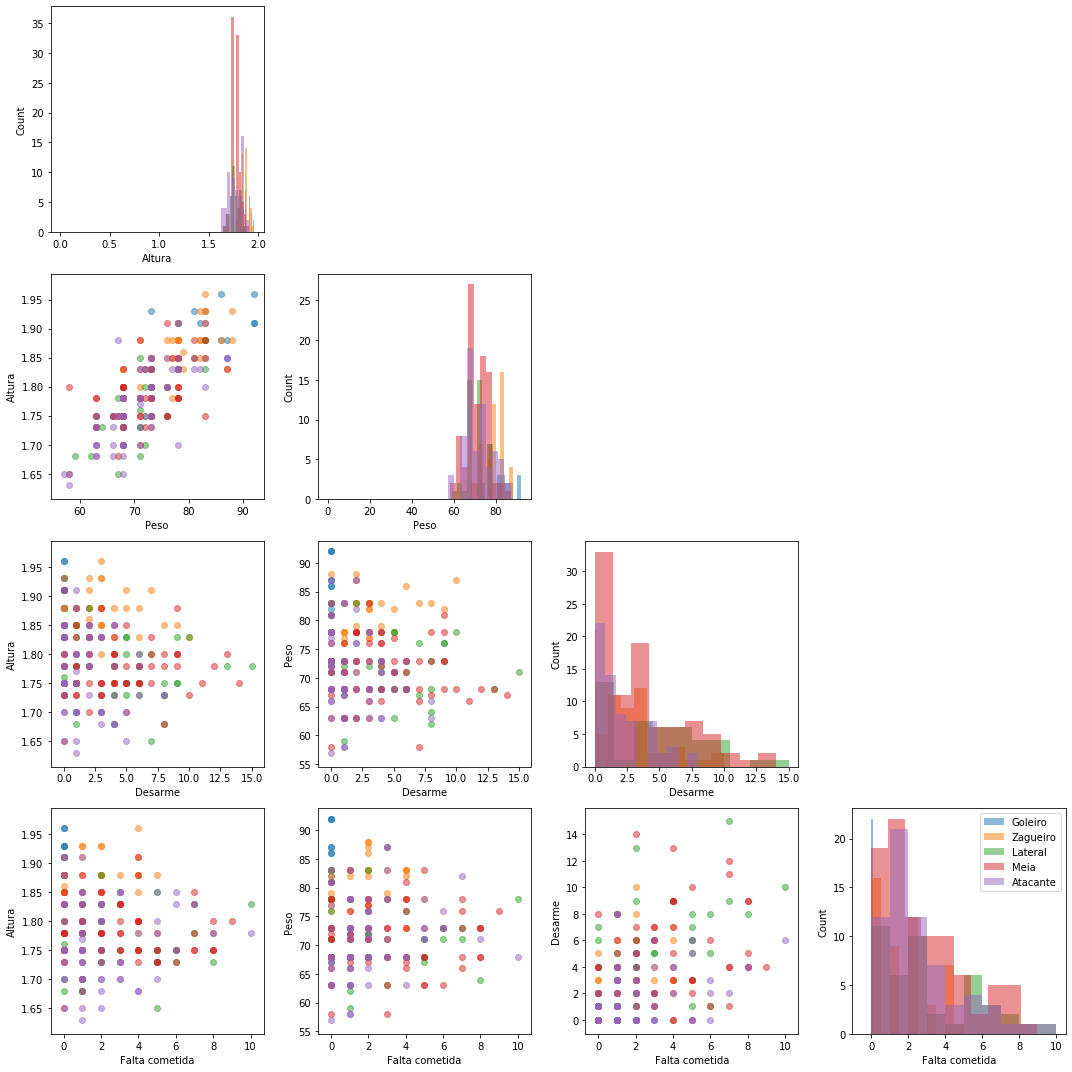

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

names =  df_jogadores.columns[:14]

fig, axes = scatterplotmatrix(X[Y==0],figsize=(15,10),alpha=0.5)
fig, axes = scatterplotmatrix(X[Y==1],fig_axes=(fig,axes),alpha=0.5)
fig, axes = scatterplotmatrix(X[Y==2],fig_axes=(fig,axes),alpha=0.5)
fig, axes = scatterplotmatrix(X[Y==3],fig_axes=(fig,axes),alpha=0.5)
fig, axes = scatterplotmatrix(X[Y==4],fig_axes=(fig,axes),alpha=0.5)
fig, axes = scatterplotmatrix(X[Y==5],fig_axes=(fig,axes),alpha=0.5,names = names)

plt.tight_layout()
plt.legend(labels=["Goleiro","Zagueiro","Lateral","Meia","Atacante"])
#plt.savefig("Image.JPEG")
plt.show()

separando as amostras em treino e teste

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=123, stratify=Y)
np.bincount(Y_train)

array([18, 38, 34, 74, 52])

Normalizando os dados para treinar o algoritimo

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)
X_train_std

array([[-0.69027094, -1.46106814,  0.70722909, ...,  2.70449362,
         1.00501231, -0.32674044],
       [ 1.26561282,  0.6975551 , -0.94961997, ..., -0.3380617 ,
        -0.81411612, -0.32674044],
       [ 1.26561282,  0.6975551 , -0.94961997, ..., -0.3380617 ,
        -0.08646475, -0.32674044],
       ...,
       [ 0.51334983,  0.6975551 , -0.94961997, ..., -0.3380617 ,
        -1.1779418 , -0.32674044],
       [-0.99117614, -0.74152706,  0.37585928, ...,  2.70449362,
        -0.57156566, -0.32674044],
       [ 0.06199204,  0.6975551 , -0.28688035, ..., -0.3380617 ,
         0.27736094, -0.32674044]])

Treinando o algoritmo 

In [75]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)

knn_model.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

Fazendo a predicao dos dados e analisando a precisao do algoritimo

In [76]:
Y_pred = knn_model.predict(X_test)
print(Y_pred)
print(Y_test)

[3 3 1 2 3 3 1 3 1 3 0 1 0 1 3 1 1 1 1 3 2 2 1 3 1 4 2 1 3 2 1 3 2 1 1 3 1
 4 3 1 3 1 4 3 0 1 0 1 3 3 1 1 2 4]
[3 3 4 3 4 3 4 2 1 3 0 3 1 1 3 2 1 1 3 3 3 2 0 2 4 4 3 1 4 2 0 4 2 1 1 4 3
 4 3 1 3 3 3 2 0 2 4 4 3 4 4 1 2 3]


In [77]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, Y_pred)

0.48148148148148145